In [ ]:
import pandas as pd

mall_customers_df = pd.read_csv('/content/Mall_Customers.csv')
mall_customers_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
mall_customers_df = mall_customers_df.drop(columns=['CustomerID'])
mall_customers_df = mall_customers_df.rename(columns= {'Annual Income (k$)' : 'Annual_income',
                                                       'Spending Score (1-100)' : 'Spending_score'})
mall_customers_df

,Gender,Age,Annual_income,Spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
mall_customers_df.describe(include='all')

,Gender,Age,Annual_income,Spending_score
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [ ]:
# Función para realizar las principales visualizaciones para las variables CONTINUAS (columns)
# Seleccionadas del dataset (df) seleccionado
def plot_cont_vars_plots(df, columns, base_fig_height = 10):
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns

  sns.set(style = 'whitegrid')  

  numb_cols = 3
  numb_rows = len(columns)
  
  print('Using plot grid of [{0}] rows and [{1}] cols'.format(numb_rows, numb_cols))
  
  fig, axs = plt.subplots(nrows = numb_rows, ncols = numb_cols)
  axs = np.reshape(axs, (numb_rows, numb_cols))
  
  fig.set_figheight(base_fig_height * numb_rows)
  fig.set_figwidth(20)
  
  counter = 0
  for column, ax in zip(columns, axs):
    sns.histplot(df[column], ax=ax[0], kde= True, color = sns.color_palette()[counter], bins = 50)
    sns.violinplot(x=df[column], ax=ax[1], color = sns.color_palette()[counter])
    sns.boxplot(x=df[column], color = sns.color_palette()[counter], ax=ax[2], width=0.3)
    counter +=1
  #return fig

# Función para realizar las principales visualizaciones para las variables DISCRETAS (columns)
# Seleccionadas del dataset (df) seleccionado
def plot_discret_vars_plots(df, columns, base_fig_height = 10):
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns

  
  sns.set(style = 'whitegrid')


  numb_cols = 2
  numb_rows = len(columns)
  
  print('Using plot grid of [{0}] rows and [{1}] cols'.format(numb_rows, numb_cols))
  
  fig, axs = plt.subplots(nrows = numb_rows, ncols = numb_cols)
  axs = np.reshape(axs, (numb_rows, numb_cols))
  
  fig.set_figheight(base_fig_height * numb_rows)
  fig.set_figwidth(20)
  
  counter = 0
  for column, ax in zip(columns, axs):
    sns.countplot(data = df, x = column, ax=ax[0], color = sns.color_palette()[counter])
    df.groupby(column).size().plot(kind='pie', ax=ax[1], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
    counter +=1
  #return fig

Using plot grid of [1] rows and [2] cols


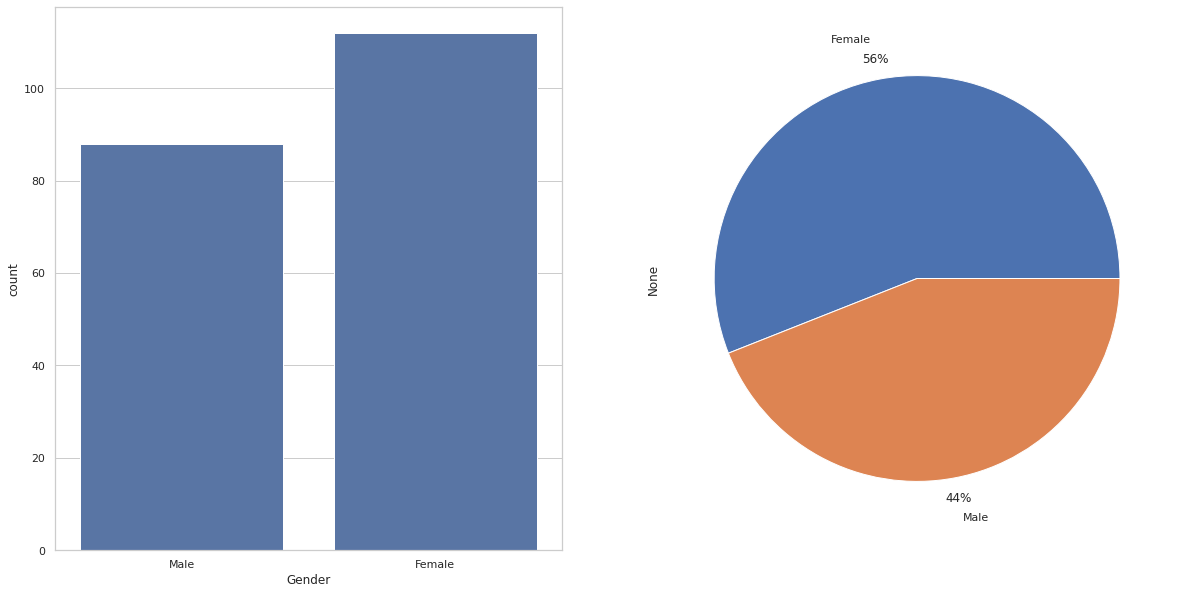

In [ ]:
plot_discret_vars_plots(mall_customers_df, ['Gender'])

Using plot grid of [3] rows and [3] cols


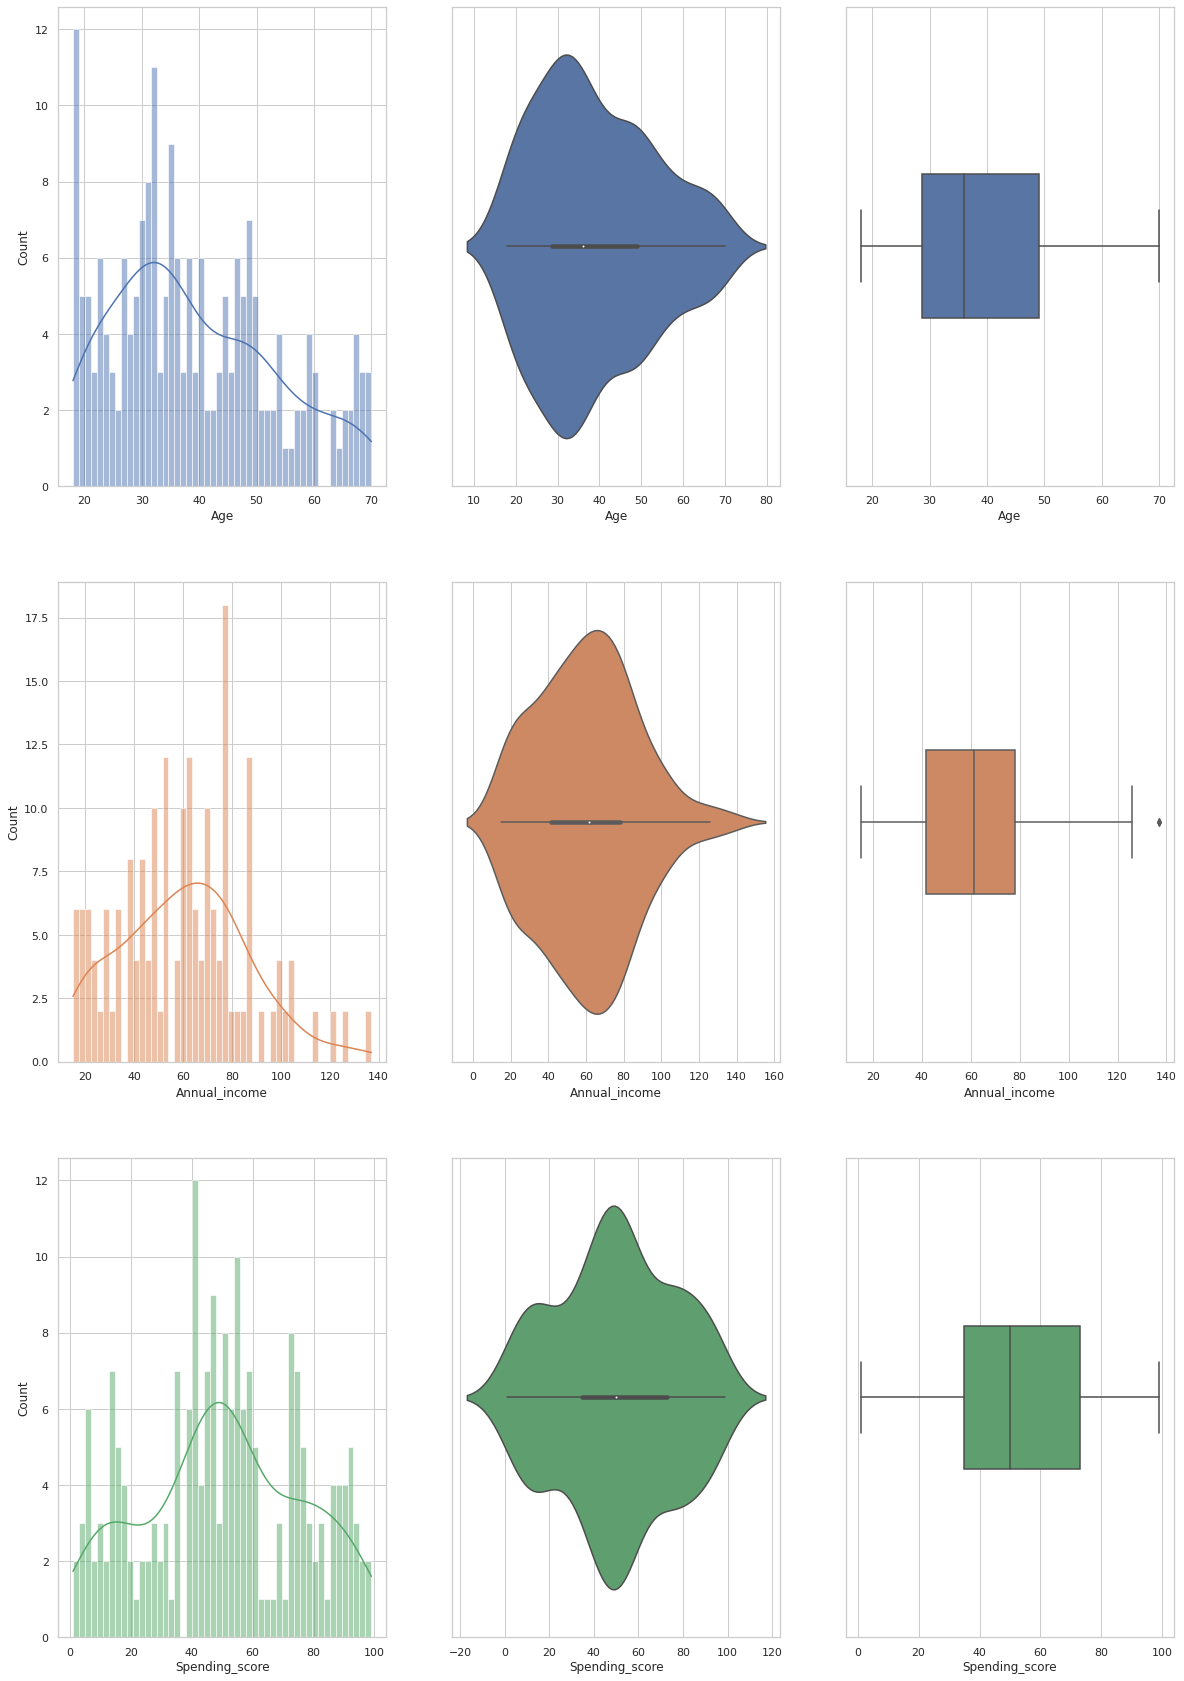

In [ ]:
plot_cont_vars_plots(mall_customers_df, ['Age', 'Annual_income', 'Spending_score'])

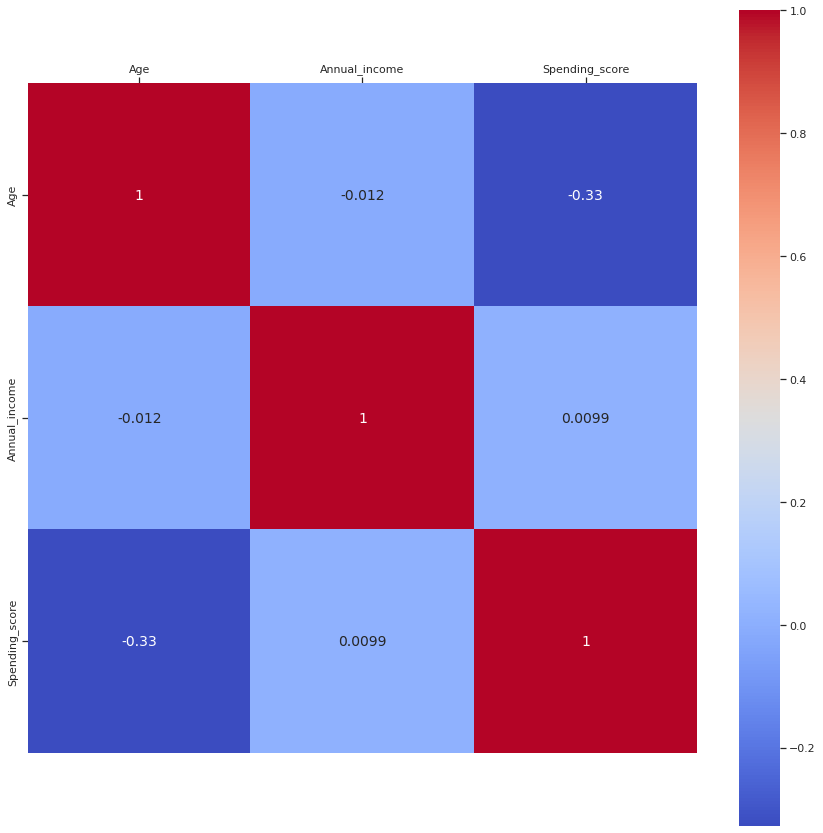

In [ ]:
def plot_correlation_matrix(corr_matrix):

  def shorten_big_col_name(col_name):
    if len(col_name)>15:
      return col_name[0:14] + '.'
    else:
      return col_name


  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns
  import math

  fig, ax = plt.subplots(nrows=1, figsize=(15, 15))
  sns.heatmap(corr_matrix, ax=ax, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

  ax.xaxis.tick_top()
  shorten_x_labels = [shorten_big_col_name(item.get_text()) for item in ax.get_xticklabels()]
  ax.set_xticklabels(shorten_x_labels)

  ax.xaxis.set_label_position('top') 
  ax.yaxis.tick_left()
  shorten_y_labels = [shorten_big_col_name(item.get_text()) for item in ax.get_yticklabels()]
  ax.set_yticklabels(shorten_y_labels)
  

plot_correlation_matrix(mall_customers_df.corr())

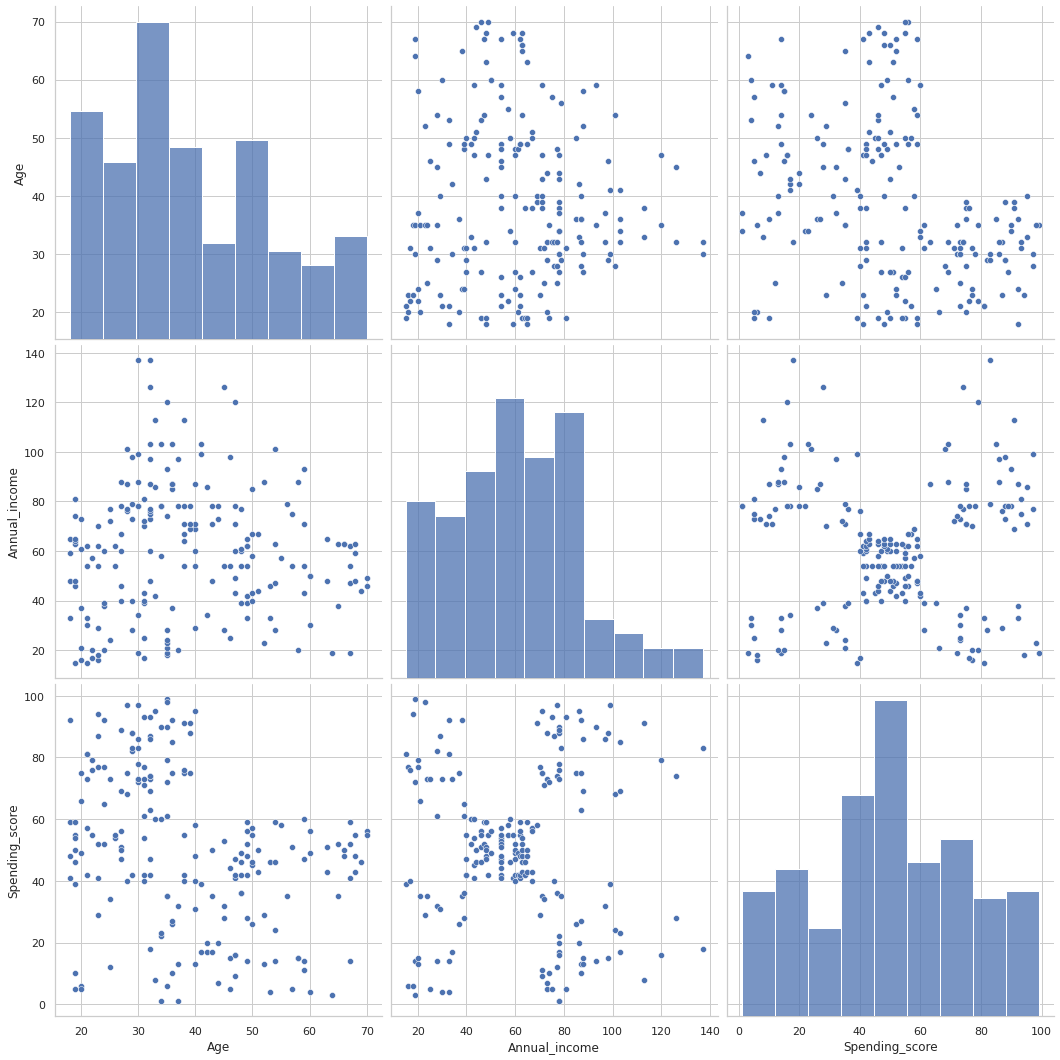

In [ ]:
import seaborn as sns

sns.pairplot(mall_customers_df, height = 5)

In [ ]:

def make_3d_scatter_plot(data, col_x, col_y, col_z, col_labels = None):
  import plotly.offline as py
  import plotly.graph_objs as go

  trace1 = go.Scatter3d(
      x= data[col_x],
      y= data[col_y],
      z= data[col_z],
      mode='markers',
      marker=dict(
          color = data[col_labels] if col_labels is not None else None,
          size= 10,
          line=dict(
              color = data[col_labels] if col_labels is not None else None,
              width= 12
          ),
          opacity=0.8
      )
  )
  df = [trace1]

  layout = go.Layout(
      title = '3D plot',
      margin=dict(
          l=0,
          r=0,
          b=0,
          t=0  
      ),
      scene = dict(
              xaxis = dict(title  = col_x),
              yaxis = dict(title  = col_y),
              zaxis = dict(title  = col_z)
          )
  )

  fig = go.Figure(data = df, layout = layout)
  py.iplot(fig)

make_3d_scatter_plot(mall_customers_df, 'Age', 'Annual_income', 'Spending_score')

In [ ]:
def make_boxplots_with_same_x_var(df, x_var, y_vars, numb_cols = 2, base_fig_height = 15):
  import matplotlib.pyplot as plt
  import seaborn as sns
  import math
  import numpy as np

  sns.set_theme(style="whitegrid")

  numb_rows = math.ceil(len(y_vars)/ numb_cols)
  
  print('Using plot grid of [{0}] rows and [{1}] cols'.format(numb_rows, numb_cols))
  
  fig, axs = plt.subplots(nrows = numb_rows, ncols = numb_cols)
  axs = np.reshape(axs, (numb_rows, numb_cols))
  
  fig.set_figheight(base_fig_height * numb_rows)
  fig.set_figwidth(20)
  
  counter = 0
  for y_var, ax in zip(y_vars, axs.flatten()):
    sns.boxplot(data = df, x = x_var, y = y_var, ax=ax, width=0.3)
    counter +=1

Using plot grid of [2] rows and [2] cols


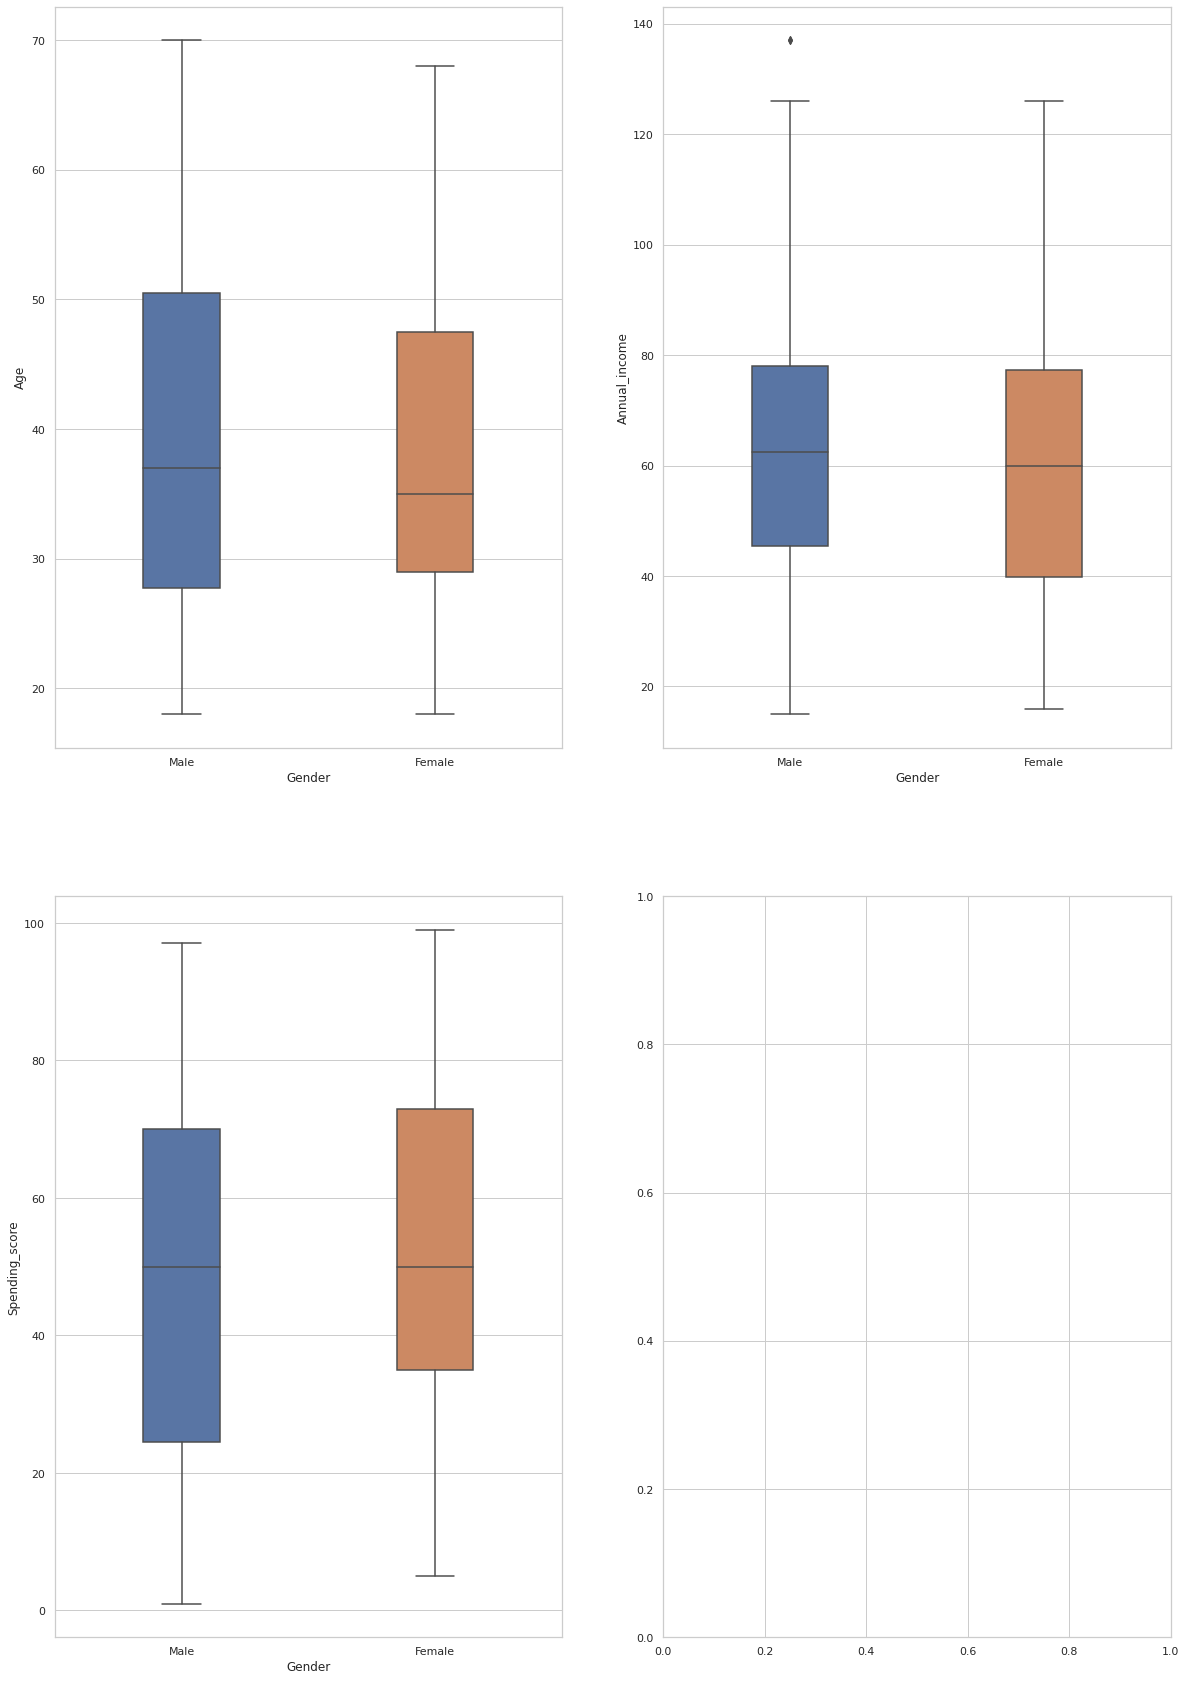

In [ ]:
make_boxplots_with_same_x_var(mall_customers_df, 'Gender', ['Age', 'Annual_income', 'Spending_score'])

In [ ]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {} - in percentage {}%'.format(col, df[col].isnull().sum(), df[col].isnull().sum()/len(df) * 100))
    print('\n')
    
display_missing(mall_customers_df)

Gender column missing values: 0 - in percentage 0.0%
Age column missing values: 0 - in percentage 0.0%
Annual_income column missing values: 0 - in percentage 0.0%
Spending_score column missing values: 0 - in percentage 0.0%




## Kmeans

### Clustering - Annual Income & Consumer Spending

In [ ]:
clustering_data = mall_customers_df[['Annual_income', 'Spending_score']]
clustering_data

,Annual_income,Spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


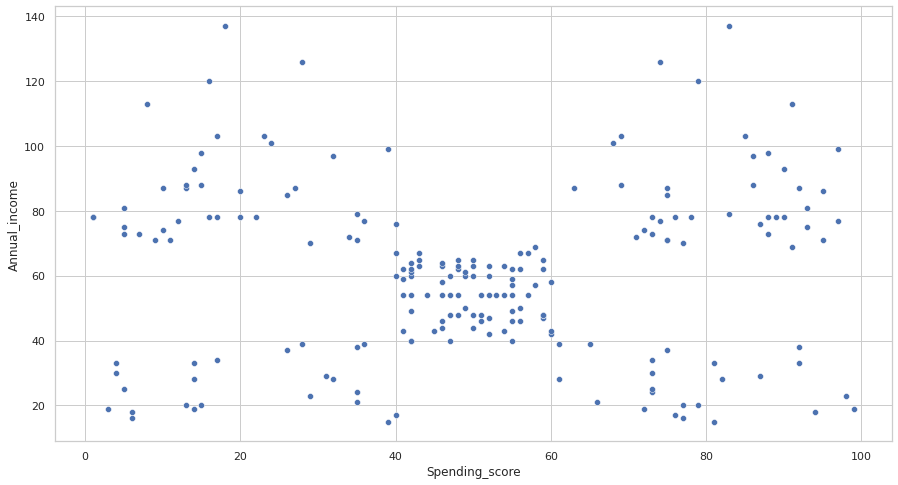

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
sns.scatterplot(data = clustering_data, x='Spending_score', y = 'Annual_income')

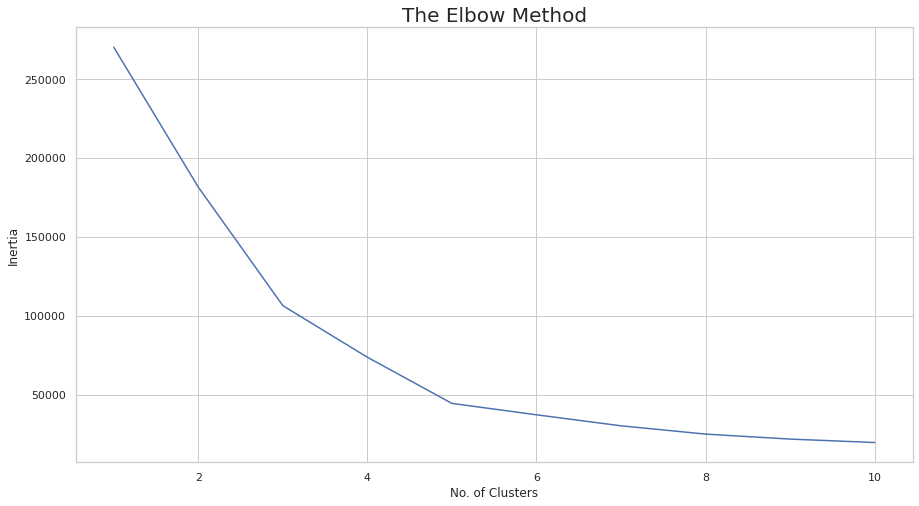

In [ ]:
from sklearn.cluster import KMeans

inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    km.fit(clustering_data)
    inertias.append(km.inertia_)

plt.figure(figsize = (15,8))
    
plt.plot(range(1, 11), inertias)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

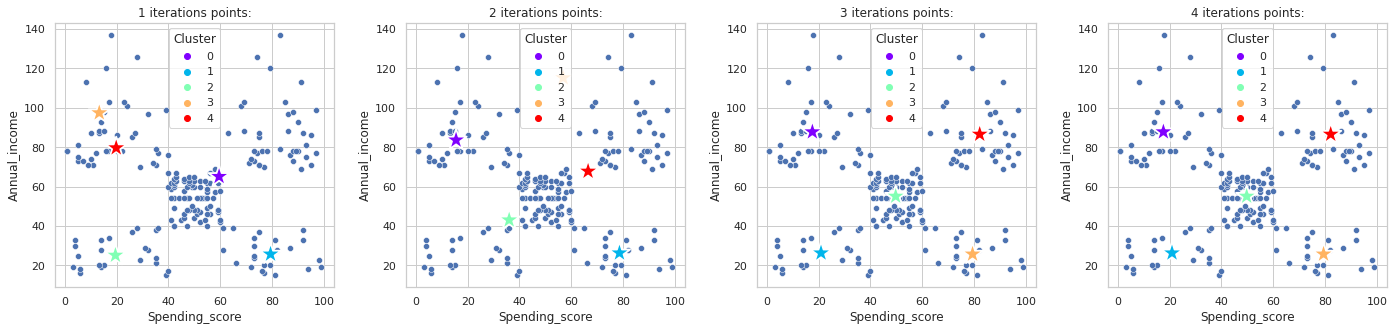

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(20,5))
fig.tight_layout(pad=3.0)

from sklearn.cluster import KMeans
for i, ax in enumerate(axs.flatten()):
    ax.title.set_text(f"{i+1} iterations points:")
    kmeans = KMeans(n_clusters=5, init = 'random', random_state=42, max_iter=i+1, n_init = i+1)
    kmeans.fit(clustering_data)
    centroids=pd.DataFrame(kmeans.cluster_centers_, columns=['Annual_income', 'Spending_score'])
    centroids['Cluster'] = range(0, len(centroids))
    #print(centroids)
    sns.scatterplot(data = clustering_data, x='Spending_score', y = 'Annual_income', ax=ax)
    sns.scatterplot(data = centroids, x='Spending_score', y = 'Annual_income', ax = ax,  s=500, marker="*", hue = 'Cluster', palette= 'rainbow')

In [ ]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
kmeans.fit(clustering_data)
centroids=pd.DataFrame(kmeans.cluster_centers_, columns=['Annual_income', 'Spending_score'])

clustering_data['Cluster'] = kmeans.predict(clustering_data)
clustering_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Annual_income,Spending_score,Cluster
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


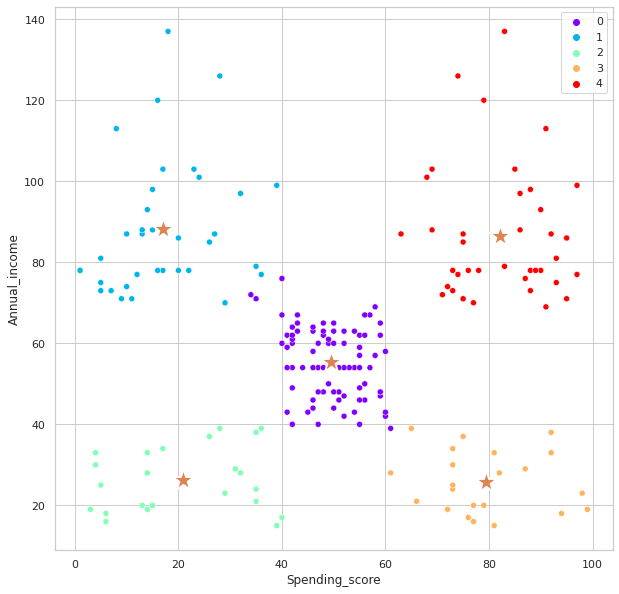

In [ ]:
def plot_clustering_results(clustering_data, var_x, var_y, cluster_centroids = None):
  fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
  sns.scatterplot(data = clustering_data, x = var_x, y = var_y, hue='Cluster', ax=ax, palette = 'rainbow')
  if cluster_centroids is not None:
    sns.scatterplot(data = cluster_centroids, x= var_x, y = var_y, ax=ax, s=500, marker="*")

plot_clustering_results(clustering_data, 'Spending_score', 'Annual_income', centroids)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



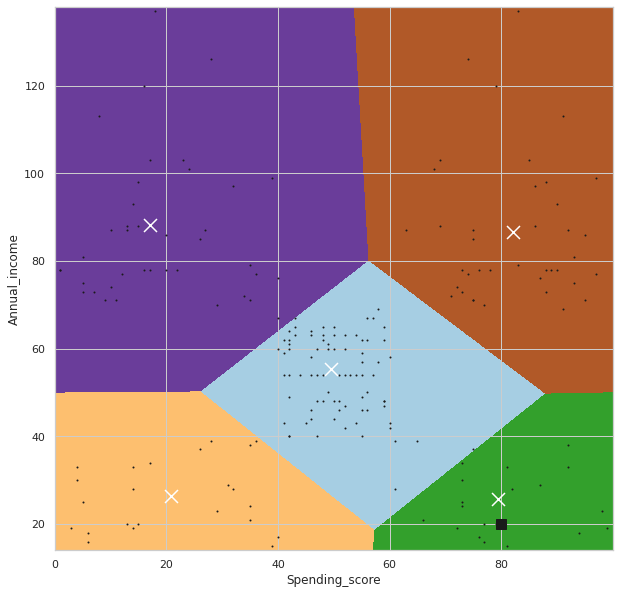

In [ ]:
def plot_clustering_results_voroni(clustering_data, var_x, var_y, cluster_centroids, cluster_model, custom_data = None):
  import numpy as np

  fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))

  h = 0.02 # Step size fo the mesh
  x_min, x_max = clustering_data[var_x].min() - 1, clustering_data[var_x].max() + 1
  y_min, y_max = clustering_data[var_y].min() - 1, clustering_data[var_y].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  #print(xx, yy)

  Z = cluster_model.predict(np.c_[xx.ravel(), yy.ravel()])
  #print(Z)

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)

  plt.figure(1)
  plt.clf()
  plt.imshow(
      Z,
      interpolation="nearest",
      extent=(xx.min(), xx.max(), yy.min(), yy.max()),
      cmap=plt.cm.Paired,
      aspect="auto",
      origin="lower"
  )

  plt.plot(clustering_data[var_x], clustering_data[var_y], "k.", markersize=2)
  # Plot the centroids as a white X
  plt.scatter(
      cluster_centroids[var_x],
      cluster_centroids[var_y],
      marker="x",
      s=169,
      linewidths=3,
      color="w",
      zorder=10,
  )

  if custom_data is not None:
    plt.plot(custom_data[var_x], custom_data[var_y], "k.", markersize=10, marker = 's')
  
  plt.xlabel(var_x)
  plt.ylabel(var_y)

plot_clustering_results_voroni(clustering_data,'Spending_score', 'Annual_income',
                               centroids, kmeans, custom_data= {'Annual_income' : 20, 'Spending_score' : 80})

In [ ]:
all_data_with_cluster = mall_customers_df.join(clustering_data[['Cluster']], how='inner')

make_3d_scatter_plot(all_data_with_cluster, 'Age', 'Annual_income', 'Spending_score', col_labels='Cluster')

### Clustering - Age & Anual Income & Consumer Spending

In [ ]:
clustering_data_2 = mall_customers_df[['Age', 'Annual_income', 'Spending_score']]
clustering_data_2

,Age,Annual_income,Spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


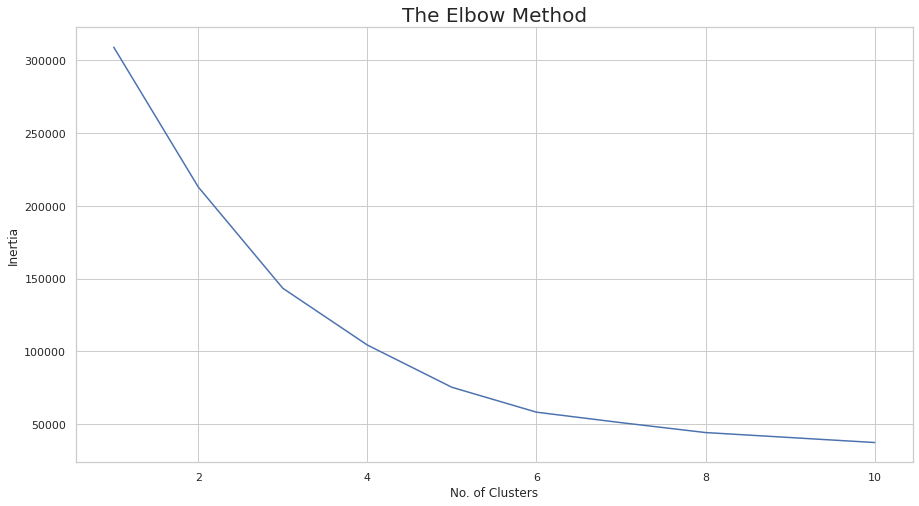

In [ ]:
from sklearn.cluster import KMeans

inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    km.fit(clustering_data_2)
    inertias.append(km.inertia_)

plt.figure(figsize = (15,8))
    
plt.plot(range(1, 11), inertias)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
kmeans.fit(clustering_data_2)
centroids=pd.DataFrame(kmeans.cluster_centers_, columns=['Age', 'Annual_income', 'Spending_score'])

clustering_data_2['Cluster'] = kmeans.predict(clustering_data_2)
clustering_data_2

,Age,Annual_income,Spending_score,Cluster
0,19,15,39,0
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,5
197,32,126,74,1
198,32,137,18,5


In [ ]:
make_3d_scatter_plot(clustering_data_2, 'Age', 'Annual_income', 'Spending_score', col_labels='Cluster')

### Clustering - PCA

In [ ]:
clustering_data_3 = mall_customers_df[['Age', 'Annual_income', 'Spending_score']]
clustering_data_3

,Age,Annual_income,Spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
clustering_data_3[['PC_1', 'PC_2']] = pca.fit_transform(clustering_data_3)
clustering_data_3

,Age,Annual_income,Spending_score,PC_1,PC_2
0,19,15,39,-31.870508,-33.001425
1,21,15,81,0.763397,-56.843865
2,20,16,6,-57.408726,-13.122936
3,23,16,77,-2.169896,-53.477905
4,31,17,40,-32.174920,-30.387005
...,...,...,...,...,...
195,35,120,79,58.353072,31.016926
196,45,126,28,19.909355,66.446425
197,32,126,74,58.521858,38.343853
198,32,137,18,20.981105,79.375146


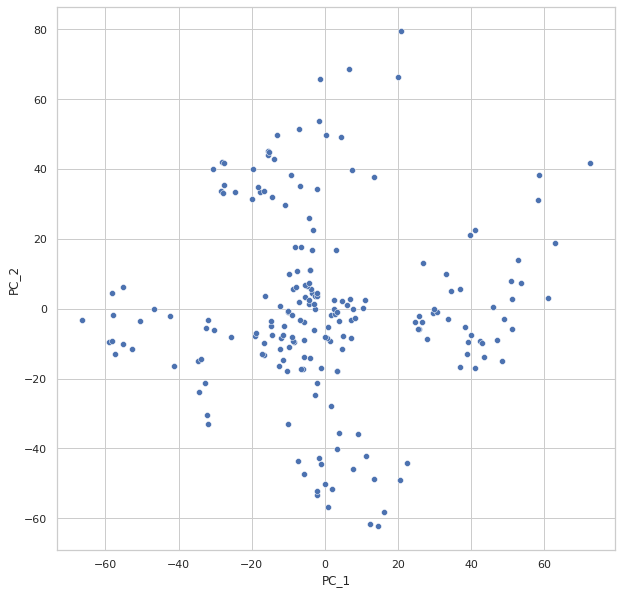

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))

sns.scatterplot(data = clustering_data_3, x='PC_1', y ='PC_2')

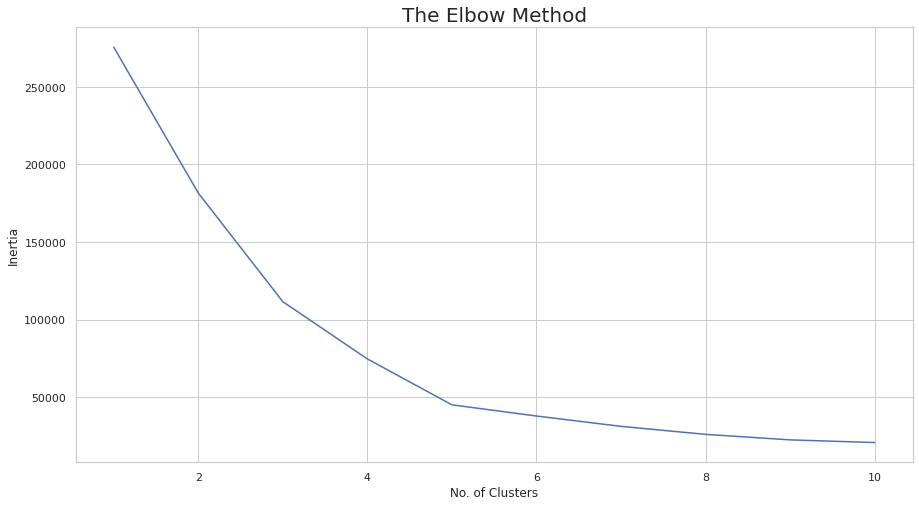

In [ ]:
from sklearn.cluster import KMeans
clustering_data_3_pca = clustering_data_3[['PC_1', 'PC_2']]
inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    km.fit(clustering_data_3_pca)
    inertias.append(km.inertia_)

plt.figure(figsize = (15,8))
    
plt.plot(range(1, 11), inertias)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
kmeans.fit(clustering_data_3_pca)
centroids=pd.DataFrame(kmeans.cluster_centers_, columns=['PC_1', 'PC_2'])

clustering_data_3_pca['Cluster'] = kmeans.predict(clustering_data_3_pca)
clustering_data_3_pca

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PC_1,PC_2,Cluster
0,-31.870508,-33.001425,2
1,0.763397,-56.843865,4
2,-57.408726,-13.122936,2
3,-2.169896,-53.477905,4
4,-32.174920,-30.387005,2
...,...,...,...
195,58.353072,31.016926,1
196,19.909355,66.446425,3
197,58.521858,38.343853,1
198,20.981105,79.375146,3


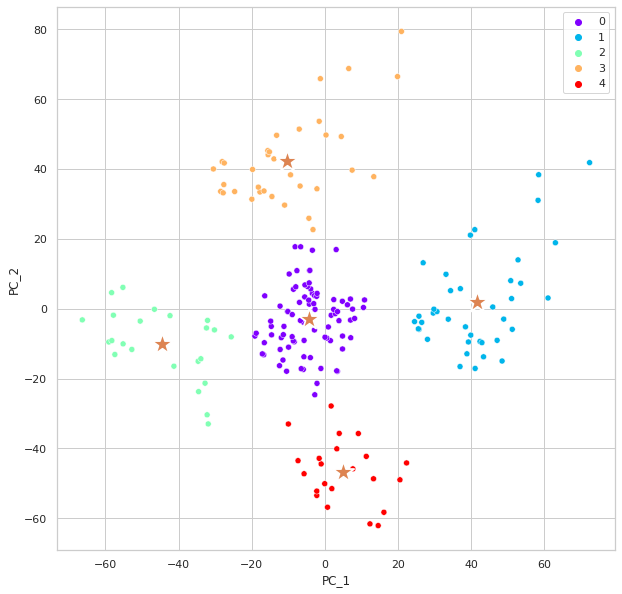

In [ ]:
plot_clustering_results(clustering_data_3_pca, 'PC_1', 'PC_2', centroids)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



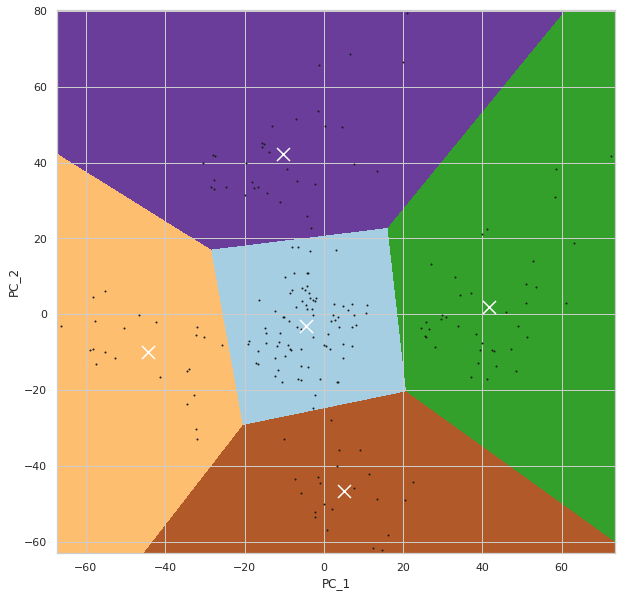

In [ ]:
plot_clustering_results_voroni(clustering_data_3_pca, 'PC_1', 'PC_2', centroids, kmeans)

## Hiererchical clustering

In [ ]:
clustering_data_4 = mall_customers_df[['Annual_income', 'Spending_score']]
clustering_data_4

,Annual_income,Spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


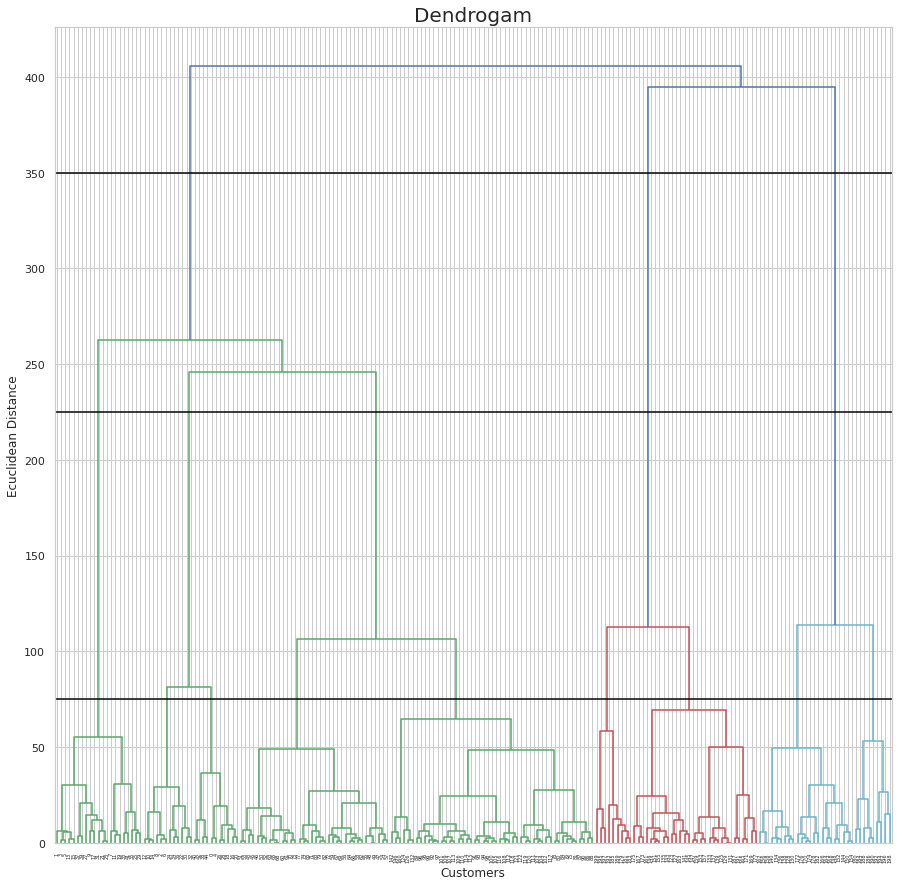

In [ ]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15,15))

distance_cuts = [75, 225, 350]

dendrogram = sch.dendrogram(sch.linkage(clustering_data_4, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')

for distance in distance_cuts:
  plt.axhline(y=distance, color='black', linestyle='-') 

plt.show()

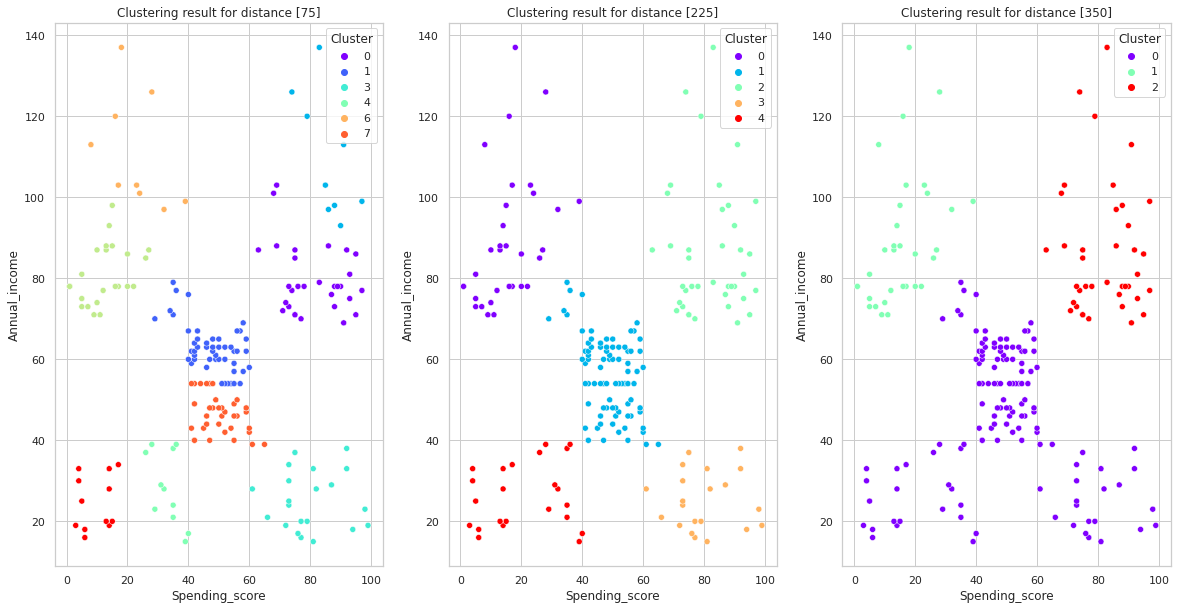

In [ ]:
from sklearn.cluster import AgglomerativeClustering

fig, axs = plt.subplots(nrows=1, ncols=len(distance_cuts),figsize=(20,10))
var_x ='Spending_score'
var_y = 'Annual_income'

for distance_thresh, ax in zip(distance_cuts, axs.flatten()):
  clustering_agg_iter = clustering_data_4.copy()
  agg_clustering_iter = AgglomerativeClustering(distance_threshold = distance_thresh, n_clusters=None, affinity = 'euclidean', linkage = 'ward')
  clustering_agg_iter['Cluster'] = agg_clustering_iter.fit_predict(clustering_agg_iter)
  sns.scatterplot(data = clustering_agg_iter, x = var_x, y = var_y, hue='Cluster', ax=ax, palette = 'rainbow')
  ax.set_title('Clustering result for distance [{0}]'.format(distance_thresh))